In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [2]:
t1 = dt.datetime.now()

In [3]:
# check python version
sys.version

'3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]'

In [64]:
# load input training dataset

home_dir = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset"

trainDS_csv = "myMethod_merged_april_2016_9cam_4bands_training_dataset_datetime.csv"
# trainDS_csv = "oldMethod_MisrAtmCalibratedModel_april_2016_training_dataset_datetime.csv"


ds_fp = os.path.join(home_dir, trainDS_csv)
os.path.isfile(ds_fp)

True

In [65]:
# label output file

name_tag = 'insample_'
date_tag = '29apr_lon230_231_'
output_filename = name_tag+date_tag+trainDS_csv.split('.')[0]+'.csv'
output_filename

'insample_29apr_lon230_231_myMethod_merged_april_2016_9cam_4bands_training_dataset_datetime.csv'

In [66]:
# read data

ds_3cam = pd.read_csv(ds_fp, engine='python')#, dtype={'An_r':np.float64})#, encoding= 'unicode_escape')


In [67]:
# check dtypes after reading dataset

ds_3cam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924456 entries, 0 to 2924455
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   path         int64  
 2   orbit        int64  
 3   block        int64  
 4   line         float64
 5   sample       float64
 6   lat          float64
 7   lon          float64
 8   Ca_r         float64
 9   Cf_r         float64
 10  An_r         float64
 11  rms          float64
 12  orbit_start  object 
 13  orbit_stop   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 312.4+ MB


In [68]:
# confirm dtypes after reading dataset
# ds_3cam = ds_3cam.astype({"line": float})

In [69]:
# ds_3cam.rename(columns={"mean_ATM_roughness":"rms"}, inplace=True)
ds_3cam.columns

Index(['Unnamed: 0', 'path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon',
       'Ca_r', 'Cf_r', 'An_r', 'rms', 'orbit_start', 'orbit_stop'],
      dtype='object')

In [70]:
# determine range to print based on min, max lat and lon of the data
# is it necessary?
# xlon = ds_3cam[' lon']
# ylat = ds_3cam[' lat']

xlon = ds_3cam['lon']
ylat = ds_3cam['lat']
# xlon
ylat[0]

74.422639

In [71]:
margin = 2 # buffer to add to the range

lat_min = min(ylat) - margin
lat_max = max(ylat) + margin
lon_min = min(xlon) - margin
lon_max = max(xlon) + margin

In [72]:
print(lat_min)
print(lat_max)
print(lon_min)
print(lon_max)

68.419483
86.250712
197.574236
277.113721


In [73]:
# for plotting needed 
from itertools import chain
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, num=7))
    lons = m.drawmeridians(np.linspace(-180, 180, num=18))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [74]:
# # ref: https://stackoverflow.com/questions/44488167/plotting-lat-long-points-using-basemap
# basemap = Basemap(llcrnrlon=lon_min,
#                     llcrnrlat=lat_min,
#                     urcrnrlon=lon_max,
#                     urcrnrlat=lat_max,
#                     lat_0=(lat_max - lat_min)/2,
#                     lon_0=(lon_max-lon_min)/2,
#                     projection='ortho',
#                     resolution = None,
#                     area_thresh=10000.,)

In [75]:
# basemap.shadedrelief()
# basemap.drawcoastlines(color='gray')
# basemap.drawcountries(color='gray')
# basemap.drawstates(color='gray')



# basemap.drawcoastlines()
# basemap.drawcountries()
# basemap.drawstates()
# basemap.drawmapboundary(fill_color='#46bcec')
# basemap.fillcontinents(color = 'white',lake_color='#46bcec')

In [76]:
# fig = plt.figure(figsize=(12, 12))

# basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

# # locations on map: convert lat and lon to map projection coordinates
# xlons, ylats = basemap(xlon, ylat)

# plt.plot(xlons, ylats, 'ok', markersize=1)

# # draw a circle on map on 60N  
# basemap.drawparallels([60], color='red') #, labels='test'????)
# plt.title('Study Region, 60N', fontsize=16)

# draw_map(basemap);

# how zoom to the region?

In [77]:
# needed for plotting
def make_the_map(XlonSet, YlatSet):
    
    fig = plt.figure(figsize=(12, 12))

    basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

    # locations on map: convert lat and lon to map projection coordinates
    xlons, ylats = basemap(XlonSet, YlatSet)

    plt.plot(xlons, ylats, 'ok', markersize=1)

    # draw a circle on map on 60N  
    basemap.drawparallels([60], color='red') #, labels='test'????)
    plt.title('Study Region, 60N', fontsize=16)

    draw_map(basemap);
    return 0;

0

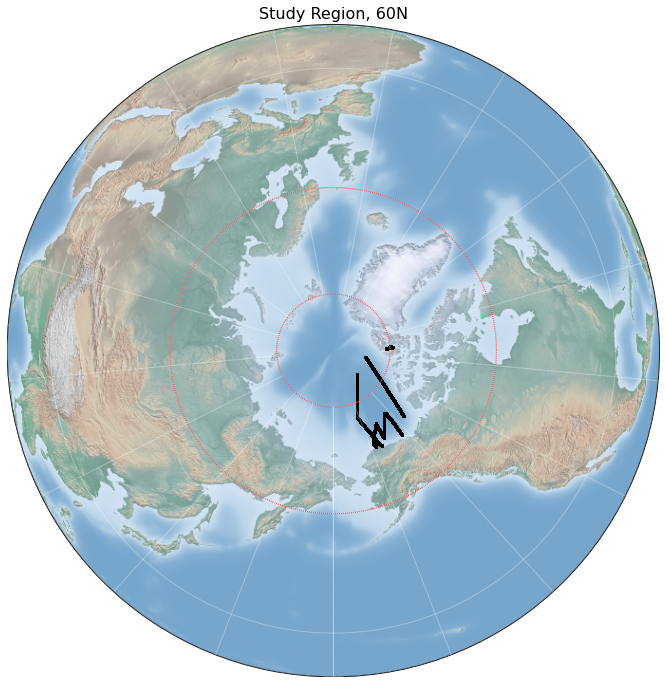

In [78]:
# run with oython >= 3.8 or install Basemap on Ubuntu

make_the_map(xlon, ylat)

In [79]:
ds_3cam['orbit_start'].min()

'2016-04-18 23:09:25+00:00'

In [80]:
ds_3cam['orbit_start'].max()

'2016-04-29 22:50:53+00:00'

## filter ATM locations

In [81]:
# extract transect by date
# filter for 19-april and then plot the transect for both my method and old method and then compare...

transect = ds_3cam.loc[(ds_3cam['orbit_start'] >= '2016-04-19 02:00:00') & 
                             (ds_3cam['orbit_stop'] <= '2016-04-19 06:00:00')]


In [82]:
# transect.head()

In [83]:
# transect['lon'].min()

In [84]:
# transect['lon'].max()

In [85]:
# extract transect by guessing longitudes

# transect = transect.loc[(transect[' lon'] > 230.0) & 
#                         (transect[' lon'] < 231.0)]


In [86]:
transect.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      int64  
 1   path         0 non-null      int64  
 2   orbit        0 non-null      int64  
 3   block        0 non-null      int64  
 4   line         0 non-null      float64
 5   sample       0 non-null      float64
 6   lat          0 non-null      float64
 7   lon          0 non-null      float64
 8   Ca_r         0 non-null      float64
 9   Cf_r         0 non-null      float64
 10  An_r         0 non-null      float64
 11  rms          0 non-null      float64
 12  orbit_start  0 non-null      object 
 13  orbit_stop   0 non-null      object 
dtypes: float64(8), int64(4), object(2)
memory usage: 0.0+ bytes


In [87]:
# create a column as index and set that column as index to plot transect

# lon_subset['index'] = [i for i in range(len(lon_subset['lon']))]
transect.index = range(1,len(transect)+1)
transect.head()

# set that column as index
# lon_subset.set_index['index']

,Unnamed: 0,path,orbit,block,line,sample,lat,lon,Ca_r,Cf_r,An_r,rms,orbit_start,orbit_stop


In [88]:
# needed for plotting

xlon_subset = transect['lon']
# ylat_subset = transect['lat']

In [89]:
# run with python >= 3.8 or install Basemap on Ubuntu

make_the_map(xlon_subset, ylat_subset)

ProjError: x, y, z, and time must be same size if included.

<Figure size 864x864 with 0 Axes>

In [63]:
# extract transect data & write it out


output_path = home_dir
output_file_fp = os.path.join(output_path, output_filename)
transect.to_csv(output_file_fp)
output_file_fp

'/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset/insample_29apr_lon230_231_oldMethod_MisrAtmCalibratedModel_april_2016_training_dataset_datetime.csv'

In [62]:
t2 = dt.datetime.now()
runtime = t2-t1
runtime

datetime.timedelta(seconds=146, microseconds=100988)